# COCOMA - Fair Division

Ce notebook présente quelques extensions de l'article suivant :

_Marc Kilgour, Rudolf Vetschera: “Two-player fair division of indivisible items: Comparison
of algorithms”, European Journal of Operational Research 2018_

Nous avons décidé d'étudier deux pistes différentes, qui sont chacune explorées dans leur notebook correspondant : 

* [Généralisation pour n agents](extensions_n_agents.ipynb)
* [Etude avec un plus grand nombre de ressources](extensions_more_items.ipynb)

Le reste de ce notebook présente les choix et l'architecture qui ont été mis en place pour tester les algorithmes.


Tout d'abord, l'outil et les algorithmes ont été écrits de manière à ce que le nombre de ressources soit un multiple du nombre d'agent, afin de rester cohérent avec les hypothèses de l'article. Il faut aussi que chaque algorithme retourne une allocation pour chaque agent qui soit de la même taille et qu'aucun item ne soit délaissé.

Pour implémenter et tester, facilement et rapidement, différents algorithmes de négociation, nous avons mis en place une architecture qui est composé des classes suivantes : 

* __Agent__ : Représente un agent négociateur (Préférences, allocations, etc). Pour le moment, uniquement les préférences de Borda sont utilisées.
* __Problem__ : Représente un problème, c'est-à-dire les agents et leur préférences, ainsi que les items en jeu. Permet aussi de vérifier les quatres propriétés de Borda : _borda proportionnal_, _borda optimal_, _borda maximum sum_ et _borda max min_.
* __ProblemSet__ : Réprésente un ensemble d'instances d'un même problème, en modifiant les préférences des agents. Sert aussi à lancer des benchmarks pour vérifier les propriétés de Borda des allocations retournées par différents algorithmes
* __Sequence__ : Réprésente l'ordre de passage des agents selon la méthode choisie. Pour le moment, nous avons implémenté _Round Robin_ et _Balanced_.
* __Algorithm__ : Représente l'éxécution d'un algorithme de négociation. En héritant de _AbstractAlgorithm_, il suffit de définir la méthode _\_compute_ pour que l'algo s'intègre au framework.
* __Database__ : Permet de générer des noms d'agents et d'items aléatoires

Deux éxécutions types sont possibles :

* __Simple__ - Résolution d'un problème avec un algorithme, selon une séquence donnée.
* __Benchmark__ - Résolution d'un grand nombre d'instances d'un problème avec les algorithme souhaité, selon une séquence donnée.

Nous allons vous les présenter rapidement.

### Benchmark

#### Principe
Cette éxécution permet de tester des algorithmes face à un jeu de problèmes qui sont identiques, si ce n'est les préférences des agents qui sont uniques pour chaque instance. Il est possible de spécifier une limite au nombre d'instances, mais par défaut, toutes les permutations possibles sont générés. C'est-à-dire qu'avec 3 agents et 6 items, environ 518 000 instances sont générées.

Le benchmark va donc ensuite éxécuter chaque algorithme au jeu de données puis vérifiées pour chaque résultat, les allocations qui vérifient les propriétés de Borda. Ces informations sont ensuite compilées dans un graphique.

#### Fonctionnement
La première partie consiste à définir un problème. C'est à dire le nombre d'agents et le nombre de ressources

In [1]:
from src.Database import *
from src.Problem import *
from src.ProblemSet import *
from src.Sequence import *
from src.Algorithm import *

# Load database
db = Database("./")

# Define a problem
nbAgents = 3
nbItems = nbAgents * 2
initial_pb = Problem(db.get_random_agents_names(nbAgents), db.get_random_items_names(nbItems))

Ensuite, il faut initialiser un ensemble d'instances du problème voulu, en spécifiant les algorithmes que l'on veut tester et le nombre d'instances que l'on souhaite

In [2]:
# Create a set of different instances of a problem
algorithms = [BottomUpAlgorithm, TrumpAlgorithm]
limit = 100
pb_set = ProblemSet(initial_pb, algorithms, limit)

Enfin, il ne reste plus qu'à lancer le benchmark selon une séquence.

In [3]:
# Test with a specific sequence
seq = Sequence.generate(initial_pb, SequenceType.ROUND_ROBIN, True)
pb_set.run(seq)

|-=-=-=-=-=-= [ STARTING BENCHMARK ] =-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_3_Items_6
|
| [3] Agents :
|	1 : Agent Gauthie
|		 Items : set()
|		 Utility : 0
|		 Rankings : phone > toilet > mirror > purse > socks > vase
|	2 : Agent Alice
|		 Items : set()
|		 Utility : 0
|		 Rankings : toilet > vase > socks > purse > mirror > phone
|	3 : Agent Annette
|		 Items : set()
|		 Utility : 0
|		 Rankings : mirror > phone > vase > purse > toilet > socks
|
| [6] Items :
|	1 : purse
|	2 : socks
|	3 : toilet
|	4 : mirror
|	5 : vase
|	6 : phone
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ SUMMARY ]-=-=-=-=-=-=-=-=-=|
|
| Problem         : Agents_3_Items_6
| Algorithms      : ['BottomUpAlgorithm', 'TrumpAlgorithm']
| Sequence        : (ROUND_ROBIN) - ['Gauthie', 'Alice', 'Annette', 'Gauthie', 'Alice', 'Annette']
| Nb of instances : 100
| Nb of agents    : 3
| Nb of items     : 6
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Pour visualiser les résultats, il suffit de lancer la commande suivante :

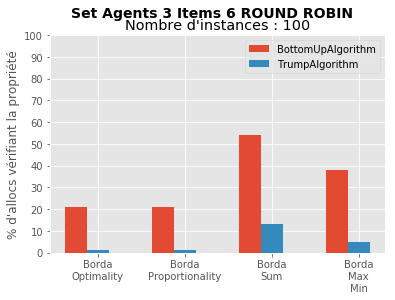

<Figure size 432x288 with 0 Axes>

In [4]:
pb_set.show_results()

Sur la figure, nous pouvons voir pour chaque algorithme testé, le pourcentage d'allocations trouvées qui vérifient chaque propriété de Borda

### Simple

#### Principe
Cette éxécution permet d'éxécuter un algorithme sur un problème et une séquence donnés. Ce mode d'éxécution sert surtout à observer le comportement de l'algorithme de négociation, grâce aux traces.

#### Fonctionnement
L'organisation est similaire au mode d'éxecution précédent. Si l'algorithme a réussi à trouver une solution, alors il vérifie chaque propriété de Borda. Dans le cas contraire, la raison est donnée lorsque ce dernier échoue.

In [5]:
from src.Database import *
from src.Problem import *
from src.ProblemSet import *
from src.Sequence import *
from src.Algorithm import *

# Load database
db = Database("./")

# Define a problem
nbAgents = 3
nbItems = nbAgents * 2
pb = Problem(db.get_random_agents_names(nbAgents), db.get_random_items_names(nbItems))

# Define an algorithm
trump_algo = TrumpAlgorithm(pb)

# Solve the problem according to a specific sequence
seq = Sequence.generate(pb, SequenceType.ROUND_ROBIN, True)
trump_algo.compute(seq)

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Eve', 'Alban', 'Gauthie', 'Eve', 'Alban', 'Gauthie']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_3_Items_6
|
| [3] Agents :
|	1 : Agent Eve
|		 Items : set()
|		 Utility : 0
|		 Rankings : towel > bow > computer > tire swing > sailboat > drawer
|	2 : Agent Gauthie
|		 Items : set()
|		 Utility : 0
|		 Rankings : tire swing > towel > computer > sailboat > bow > drawer
|	3 : Agent Alban
|		 Items : set()
|		 Utility : 0
|		 Rankings : bow > towel > drawer > computer > tire swing > sailboat
|
| [6] Items :
|	1 : towel
|	2 : bow
|	3 : sailboat
|	4 : drawer
|	5 : tire swing
|	6 : computer
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ START ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

... Considering rank 1
----- Round 1 -----
Re